In [2]:
import pandas as pd
import glob

In [80]:
dfs = []
for file in glob.glob('data/jsonl/3167-filtered-3.jsonl'): #data/dataset-normalized-5000-with-imports/*.jsonl
    print(file)
    data = pd.read_json(file, lines=True)
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)
del data

data/jsonl/3167-filtered-3.jsonl


In [81]:
df['repository'].nunique()

3145

## why not 3167 repositores for 3k files? # 
It was, before 
 * filtering ~6k files out by "line length" heuristics
 * filtering ~1k generated files
 
```
find data/dataset-normalized-5000-with-imports -iname "*.jsonl" | wc -l

find data/dataset-normalized-5000-with-imports -iname "*.*.jsonl" | awk -F'/' '{print $3}' | sort -d > 3000-repos-jsonl
```

```python
import os
with open("3000-repos-df", "w") as f:
    for org_repo in df.repository.sort_values().unique():
        org, repo = os.path.split(org_repo)
        f.write(f"{org}_{repo}.jsonl")
        f.write("\n")
```

In [82]:
df

,repository,size,sha,content,filepath,license
0,0ad/0ad,2509,51c1894ca7887b51dbee60994adb161ac77b2948f32ee7...,,libraries/source/cxxtest-4.4/python/python3/cx...,
1,0ad/0ad,2225,50ecf3c0377cc81322dc8cce8fc63350bc3a4fd056e360...,,source/tools/fontbuilder2/FontLoader.py,
2,0ad/0ad,1784,d2b38e70785f94c7d66b149f35cbf8c1ce850b3e70ac7c...,,libraries/source/cxxtest-4.4/python/setup.py,
3,0ad/0ad,549,3f13c62677566db455114db13ea9e138ef44c446433564...,,libraries/source/cxxtest-4.4/build_tools/SCons...,
4,0ad/0ad,2962,c5740d60833387c47c4a13f5744d3e2d9a31ba39038507...,,source/tools/webservices/profilemiddleware.py,
...,...,...,...,...,...,...
248272,zzzeek/sqlalchemy,1951,e41156afadb43ebd23d6c0264f214e59c30dad226fc31b...,,lib/sqlalchemy/engine/util.py,
248273,zzzeek/sqlalchemy,16327,4c150d2ae898d68e70c39c4c284ffdd75cb2658ade7095...,,lib/sqlalchemy/orm/instrumentation.py,
248274,zzzeek/sqlalchemy,26501,903a0a76c46c78f42c67c429b69ed93b204e914d416319...,,test/engine/test_reconnect.py,
248275,zzzeek/sqlalchemy,375,50aba9ba30fce98ac7692739a0d4271c8604316f7e0d76...,,examples/space_invaders/__init__.py,


In [83]:
df[df['size'] < 1*1024*1024].sha.count()

248277

In [84]:
df.sha.nunique()

210815

In [85]:
dup_sha = df.groupby('sha').size().reset_index(name='count').sort_values(by='count', ascending=False)
dup_sha[dup_sha['count']>1]

,sha,count
1404,01ba4719c80b6fe911b091a7c05124b64eeece964e09c0...,336
80050,615f131b5a16e184e88522fc5e89c7f80466e3a4a81815...,235
107293,8274277ad0d0d23426b3a15462b98a68bad173f8cb7131...,204
92371,70605ccf393d5ca87f002d3efa79546e9aeb15aecf5f6b...,148
49678,3c555e5614c89ffb168132f9ab294adbd4163ffea50911...,139
...,...,...
37567,2d81345091417c8044abc996f3da10e66f5cac7baa1159...,2
54034,41ca9d8c9875f406a950817471f3e71fc5bb0fbeee0997...,2
109829,858b9ded3d24bdff13999de0bd46220fc7cfae3c63a329...,2
53979,41b9779374d76a0d2afb6dfbddc5a8c24c428b79767659...,2


In [86]:
dup_sha[dup_sha['count']>1].sum()

sha      01ba4719c80b6fe911b091a7c05124b64eeece964e09c0...
count                                                57650
dtype: object

In [87]:
pd.set_option('max_colwidth', None)
dup_sha[dup_sha['count']>1]

,sha,count
1404,01ba4719c80b6fe911b091a7c05124b64eeece964e09c058ef8f9805daca546b,336
80050,615f131b5a16e184e88522fc5e89c7f80466e3a4a818157ec233ab5bec2c8bc2,235
107293,8274277ad0d0d23426b3a15462b98a68bad173f8cb71315e477be25649d1651c,204
92371,70605ccf393d5ca87f002d3efa79546e9aeb15aecf5f6bdf8f94d9e9926df748,148
49678,3c555e5614c89ffb168132f9ab294adbd4163ffea509119701aa0546dd042ff5,139
...,...,...
37567,2d81345091417c8044abc996f3da10e66f5cac7baa11594f24df3bdfe88b2374,2
54034,41ca9d8c9875f406a950817471f3e71fc5bb0fbeee099714714aa5a6e46778ce,2
109829,858b9ded3d24bdff13999de0bd46220fc7cfae3c63a329e8a99f9d7b5ad389ef,2
53979,41b9779374d76a0d2afb6dfbddc5a8c24c428b79767659e10f65305844987be1,2


In [79]:
pd.reset_option('max_colwidth')
df[df.sha == 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855']

,repository,size,sha,content,filepath,license
4,0ad/0ad,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,source/tools/i18n/extractors/__init__.py,
21,0ad/0ad,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,source/tools/webservices/__init__.py,
30,0ad/0ad,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,libraries/source/cxxtest-4.4/build_tools/SCons...,
32,0ad/0ad,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,libraries/source/cxxtest-4.4/build_tools/SCons...,
35,0ad/0ad,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,source/tools/webservices/userreport/templateta...,
...,...,...,...,...,...,...
262716,zzzeek/sqlalchemy,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,test/sql/__init__.py,
262737,zzzeek/sqlalchemy,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,test/ext/__init__.py,
262783,zzzeek/sqlalchemy,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,test/dialect/mssql/__init__.py,
262796,zzzeek/sqlalchemy,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,test/orm/__init__.py,


In [95]:
#df.groupby('repository').size().sort_values().plot.bar()

<AxesSubplot:>

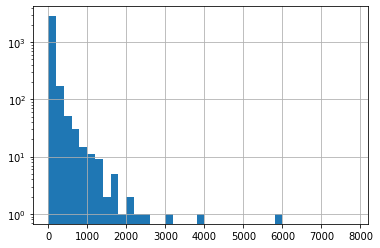

In [88]:
# number of files per-repo
df.groupby('repository').size().hist(bins=range(0, 8000, 200), log=True)

In [89]:
df.groupby('repository').size().sort_values() #.max()


repository
guoguibing/librec                   1
warpling/Macmoji                    1
way-cooler/way-cooler               1
fogleman/pt                         1
fossasia/fossasia.org               1
                                 ... 
tensorflow/tensorflow            2378
getsentry/sentry                 2506
catboost/catboost                3182
home-assistant/home-assistant    3830
AppScale/appscale                5933
Length: 3145, dtype: int64

In [90]:
df[df.repository == 'tensorflow/tensorflow'].groupby('repository').size()

repository
tensorflow/tensorflow    2378
dtype: int64

<AxesSubplot:>

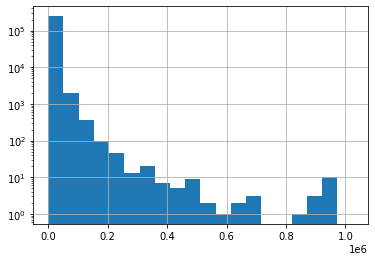

In [91]:
# file size
df['size'].hist(bins=range(0, 1*1024*1024, 550*1024, log=True))

In [92]:
df['size'].max()

1047352

In [93]:
df[df['size'] > 0.8*1024*1024]

,repository,size,sha,content,filepath,license
91339,daviddrysdale/python-phonenumbers,889970,4523ec1e14b5fbaf24eabfb819e15270f55b47b0a57e0c93254e4f2ced4af70b,,python/phonenumbers/geodata/data4.py,
91343,daviddrysdale/python-phonenumbers,931359,677911cd5ba09d4400446060125507ed8ec5766c63f1d9cd1ac9093953ef0cdc,,python/phonenumbers/geodata/data16.py,
91349,daviddrysdale/python-phonenumbers,927452,25660d31a5b1e011cc45727839b72f9ef8cbfc1aa8fe0b3b85ebdf7943ab9348,,python/phonenumbers/geodata/data15.py,
91357,daviddrysdale/python-phonenumbers,932555,537fb64338744be0a332068e6f7215d5042aeae716218131c1b80be73bedcc94,,python/phonenumbers/geodata/data17.py,
91361,daviddrysdale/python-phonenumbers,920742,8d8e8ae9be774f3bec428bc522053d2dd8d42e423ccf815edf37af2d4fda0cd3,,python/phonenumbers/geodata/data20.py,
91363,daviddrysdale/python-phonenumbers,927753,ee5ea4ac20d9ba70d64aea14e11e2087ddf86032be9b7ab680044f61f0bd9133,,python/phonenumbers/geodata/data21.py,
91376,daviddrysdale/python-phonenumbers,928371,b2d878281fb9d4dad34e74ae6dbe8d9a62635f4eb9d47e46ac3d5ce20ce814d5,,python/phonenumbers/geodata/data22.py,
91388,daviddrysdale/python-phonenumbers,930307,f45c5cccfb73b41d8576ea8371bc8369a194a67af28c9e4e738d379b884b9073,,python/phonenumbers/geodata/data23.py,
91398,daviddrysdale/python-phonenumbers,920711,30e1eee8e63a2a4d2cb6e2d4d1ee461e348c15a901a30913c605be11b2c3b878,,python/phonenumbers/geodata/data14.py,
91402,daviddrysdale/python-phonenumbers,928959,1023c2d74e082fd281c9b6f7be736f315ab656dca803a7f4e038789baf929263,,python/phonenumbers/geodata/data18.py,


In [94]:
df[df.sha == ""]

,repository,size,sha,content,filepath,license


In [187]:
df[df['size'] > 1*1024*1024]

,repository,size,sha,content,filepath,license
17197,DonJayamanne/pythonVSCode,1708882,,,data/get-pip.py,
18108,Ewenwan/MVision,1594471,,,MXnet/self_lear_mxnet/get-pip.py,
18746,Gerapy/Gerapy,1594471,,,Deploy_Python3/roles/supervisor/files/get-pip.py,
23640,IronLanguages/main,2030145,,,Languages/IronPython/Tests/stress/bigimport1_t...,
28997,Microsoft/vscode-python,1708882,,,data/get-pip.py,
59688,ambv/black,1472551,,,profiling/mix_huge.py,
62754,ansible/ansible-container,1594471,,,container/docker/files/get-pip.py,
65672,apache/hive,1588323,,,standalone-metastore/metastore-common/src/gen/...,
99744,daviddrysdale/python-phonenumbers,1297805,,,python/phonenumbers/geodata/locale.py,
122462,fxsjy/jieba,2700685,,,jieba/posseg/prob_emit.py,
